In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\prajw\Data Science\Assignments\14 Decision Tree\Fraud_check.csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
df.skew(numeric_only=True)

Taxable.Income     0.030015
City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [7]:
df.kurt(numeric_only=True)

Taxable.Income    -1.199782
City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

In [8]:
tax_inc =[]
for i in df['Taxable.Income']:
    if i<=30000:
        tax_inc.append('Risky')
    else:
        tax_inc.append('Good')
df['tax_inc'] = tax_inc
        

In [9]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'tax_inc'],
      dtype='object')

In [10]:
df.drop('Taxable.Income', axis=1, inplace=True)
df.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   tax_inc          600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [12]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
df['Undergrad'] = Le.fit_transform(df['Undergrad'])
df['Marital.Status'] = Le.fit_transform(df['Marital.Status'])
df['Urban'] = Le.fit_transform(df['Urban'])
df['tax_inc'] = Le.fit_transform(df['tax_inc'])

In [14]:
corr=df.corr(numeric_only=True)

<Axes: >

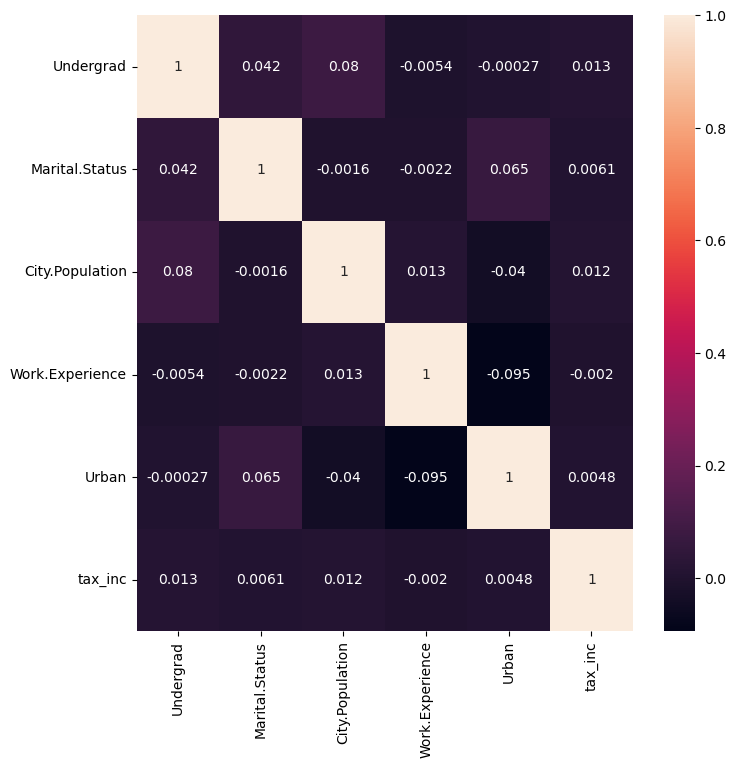

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True)

C:\Users\prajw\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


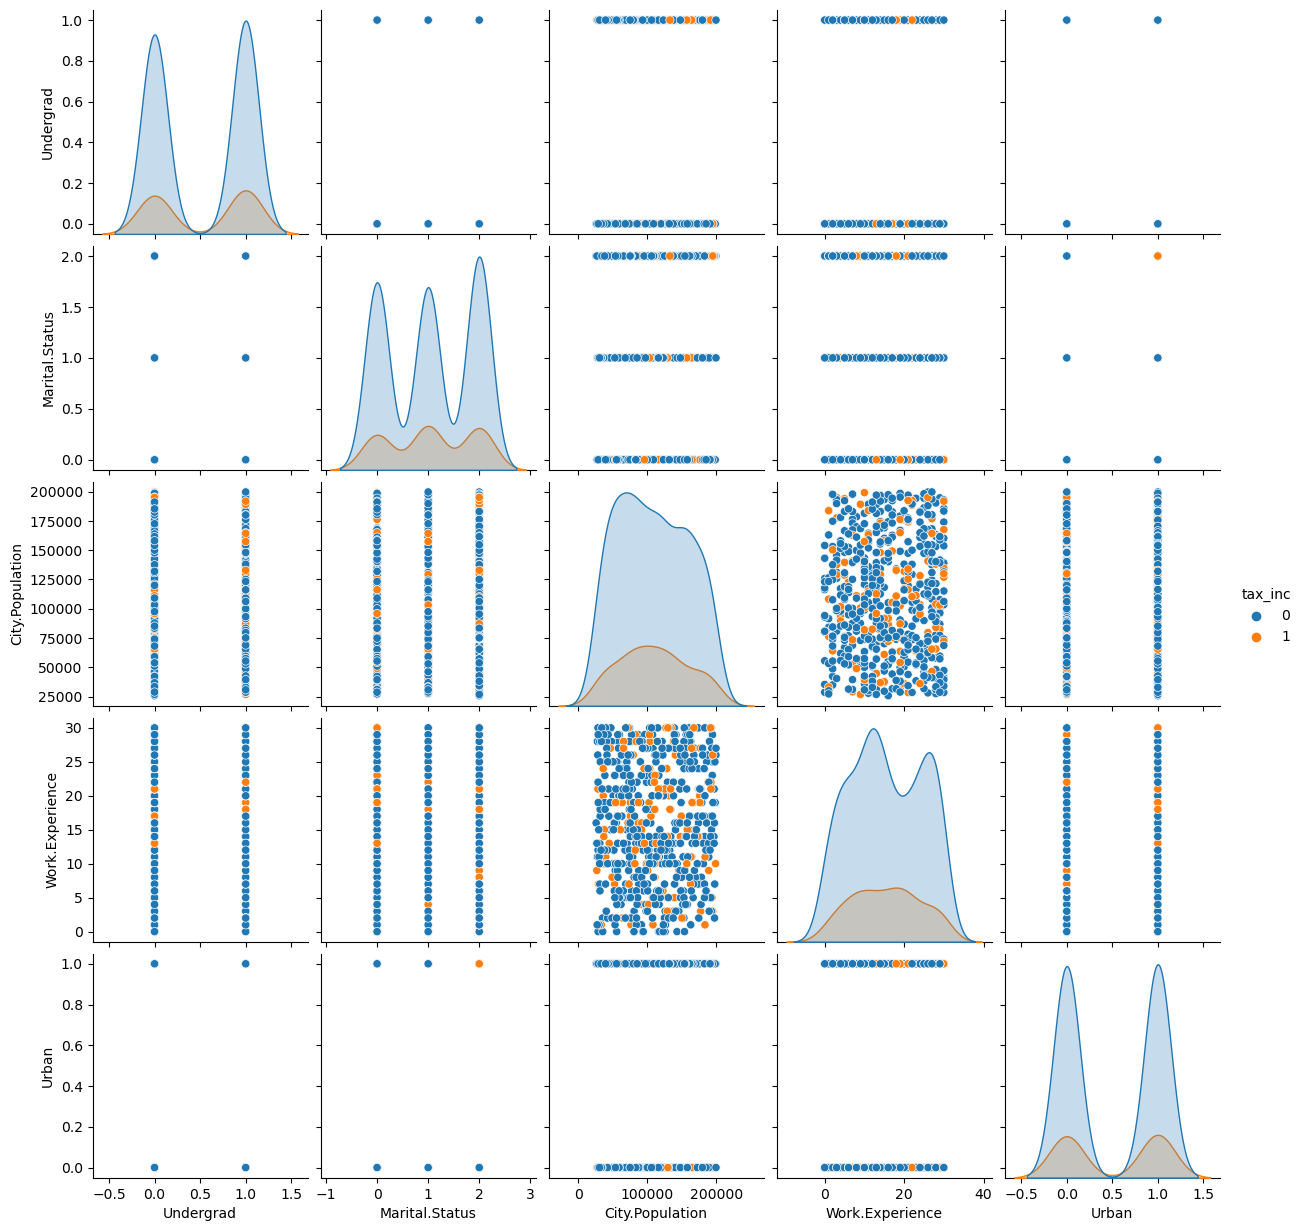

In [16]:
sns.pairplot(df, hue = 'tax_inc')
plt.show()

In [17]:
df.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [18]:
x=df.iloc[:,1:]
y=df.iloc[:,:1]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=2)

In [21]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [22]:
dtc=DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [23]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [24]:
dtc

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5267857142857143, 0.9, 'x[1] <= 75026.5\nentropy = 1.0\nsamples = 480\nvalue = [235, 245]'),
 Text(0.2857142857142857, 0.7, 'x[1] <= 63282.5\nentropy = 0.99\nsamples = 147\nvalue = [82, 65]'),
 Text(0.14285714285714285, 0.5, 'x[1] <= 56165.0\nentropy = 1.0\nsamples = 112\nvalue = [55, 57]'),
 Text(0.07142857142857142, 0.3, 'x[2] <= 0.5\nentropy = 0.989\nsamples = 91\nvalue = [51, 40]'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.982\nsamples = 88\nvalue = [51, 37]'),
 Text(0.21428571428571427, 0.3, 'x[1] <= 57501.0\nentropy = 0.702\nsamples = 21\nvalue = [4, 17]'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]'),
 Text(0.25, 0.1, 'entropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(0.42857142857142855, 0.5, 'x[2] <= 12.5\nentropy = 0.776\nsamples = 35\nvalue = [27, 8]'),
 Text(0.35714285714285715, 0.3, 'x[2] <= 6.5\nentropy = 0.98\nsamples = 12\nvalue = [7, 5]'),
 T

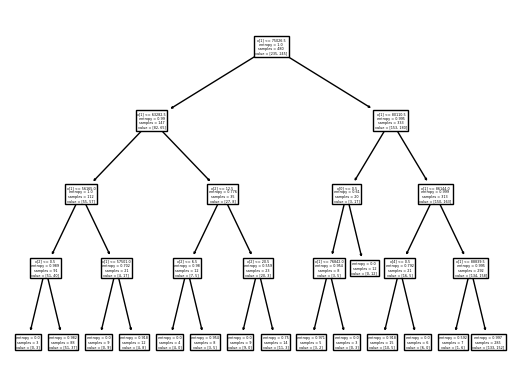

In [25]:
from sklearn import tree
tree.plot_tree(dtc)

In [26]:
y_train.value_counts().keys()

MultiIndex([(1,),
            (0,)],
           names=['Undergrad'])

In [27]:
df['tax_inc'].value_counts()

tax_inc
0    476
1    124
Name: count, dtype: int64

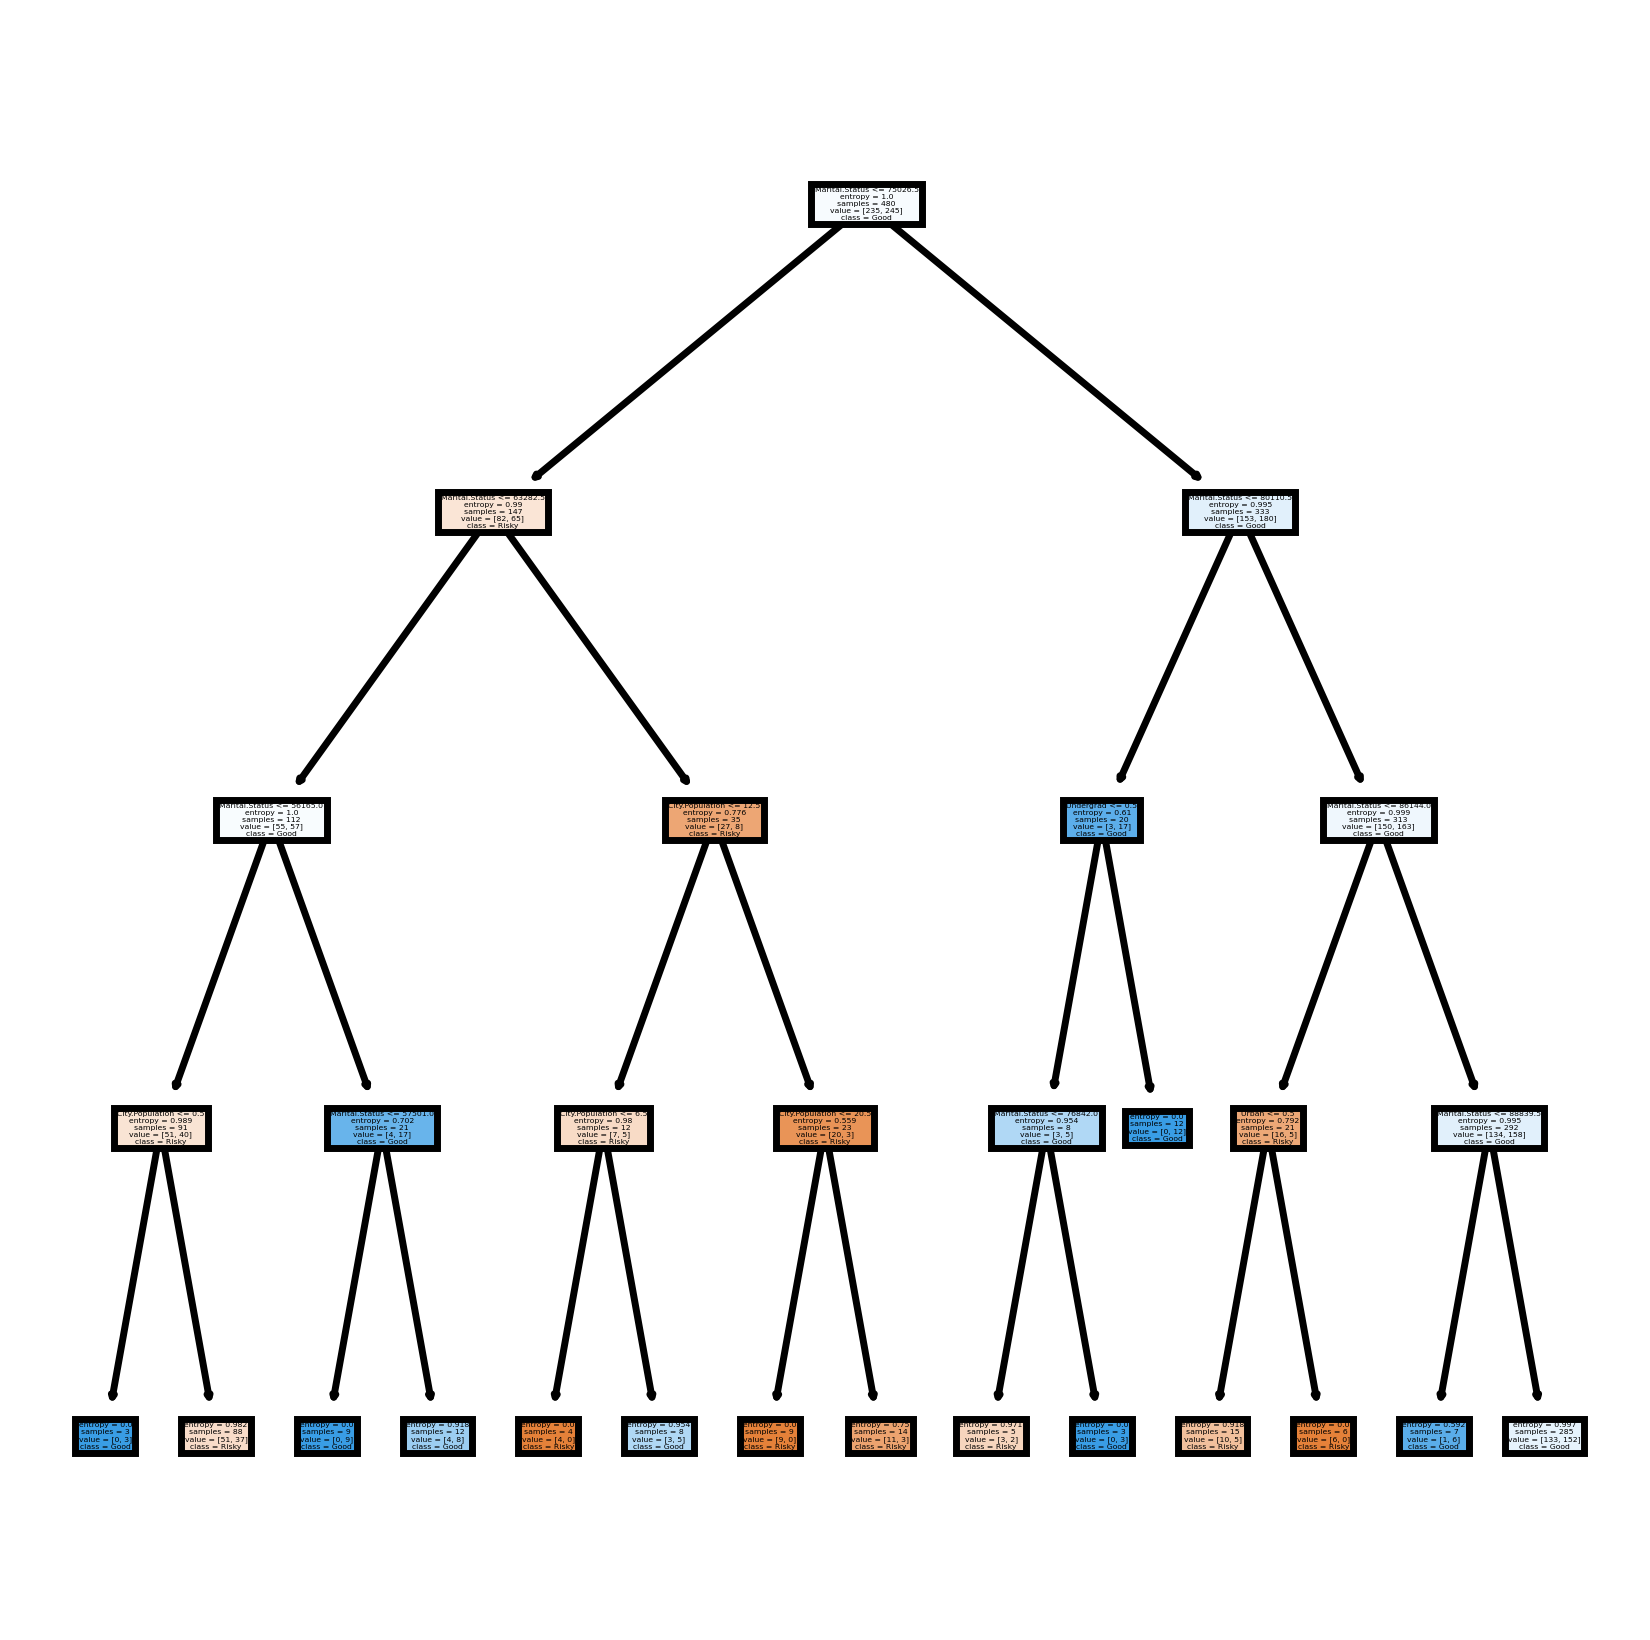

In [28]:
col = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(dtc, feature_names = col, class_names = cn, filled = True)
plt.show()

In [29]:
pred=dtc.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
accuracy_score(y_test,pred)

0.6083333333333333

In [32]:
confusion_matrix(y_test,pred)

array([[18, 35],
       [12, 55]], dtype=int64)

In [33]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [34]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [35]:
pred=model_gini.predict(x_test)

In [36]:
accuracy_score(y_test,pred)

0.6166666666666667